<a href="https://colab.research.google.com/github/SepehrSepehri/DataForGoodWR/blob/main/DataForGood_v4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learn Twitter Data scraping & analysis**

# 1- Scraping Data

## **1-1- Accessing web APIs**
<br>

**Background:**


*Application Program Interfaces (APIs) are sets of protocols that govern interactions between sites and users.*

APIs are similar to web browsers but Web APIs manage and organize data.

For public APIs, many sites only allow authorized users:
*Twitter, Facebook, Instagram, Github, etc.*

<br>



**Twitter APIs:**

To connect to Twitter's APIs, users need a consumer key and consumer secret, which you can get by creating a Twitter app.



Creating a Twitter App
1. Log in to your [Twitter.com](https://) account
2. Go to [apps.twitter.com](https://)
3. Select: Create New App

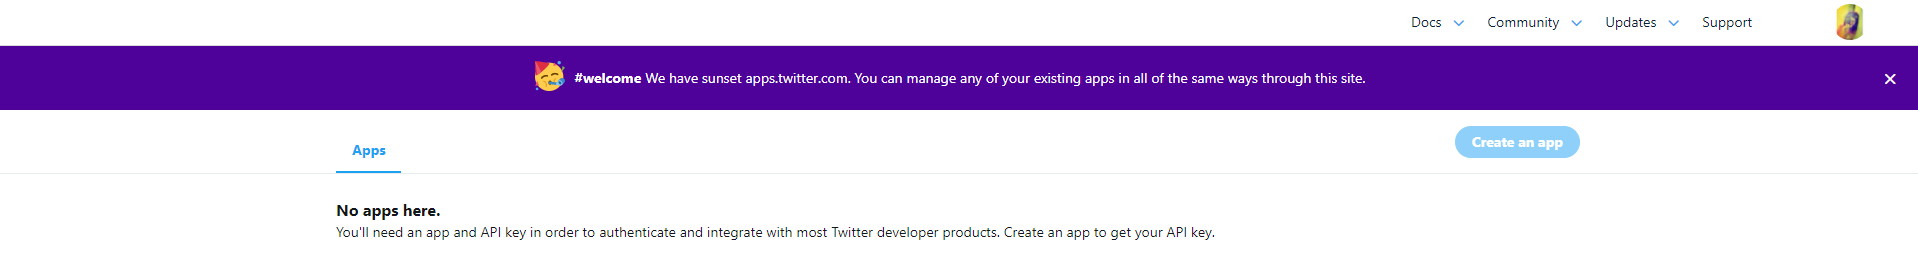

Complete the fields (important: Callback URL must be exact)


*   Name: twitter_app
*   Description: something about analyzing Twitter data
*   Website: https://twitter.com/{{you_screen_name}}
*   Callback URL: http://127.0.0.1:1410

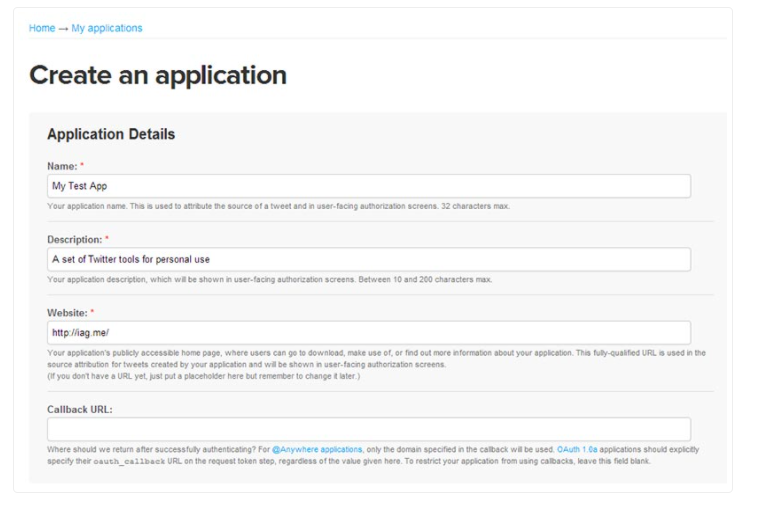

Copy the keys

*   Click Create your Twitter application
*   Select Keys and Access Tokens tab
*   Copy the Consumer Key (API Key) and Consumer Secret (API Secret) and paste into R script

In [1]:
consumer_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'



consumer_key= '45hi7CFjZQqsprTqlzxZcNFUB'
consumer_secret= 'T9f4w2IcYnlzkfjJZz5l2sNdnXkrkI2DByHjsQ4Z431hLAwteV'
access_token= '972174679443156992-lxnYCXh7aErUU3lu453rwJ9HNJ18ura'
access_token_secret= 'F5K0fv79PrpyaKuhHMUhYudCFPX7nsKyMwhpUZiT78gxH'



In [3]:
# connecting to twitter API and Creating API object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## **1-2- Extracting tweets and Exploring Dataset**
*   Read in the tweets data using pandas
*   Explore the data
*   Some ideas of things to look for:
  *   the dimensions of the data
  *   get DataFrame info
  *   get summary statistics
  *   get the value counts of categoric columns
  *   count missing values





In [2]:
# importing libraries:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [7]:
# Define Supporting fucntions to extract url and hashtags from data:
def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']

    # Sepehr: I defined this function to extract hashtags:
def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']

# Define a fucntion to extract tweets from a twitter account timeline and save them in a Pandas Dataframe:
def tweet(user):
  print(f'retrieving tweets from {user}.... ')
  print('This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.')
  tweets = tw.Cursor(api.user_timeline,
                   screen_name=user,
                   lang="en",
                   since="2010-01-20",
                   until='2021-02-28').items(10000)

  
  users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]

  tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['ID','created_at', 'screen_name','text', 'location',
                             'favorite_count', 'retweet_count','followers_count','friends_count',
                             'URL','hashtags'])

  print('retrieving tweets has been finished.')
  print(f'{len(tweet_text)} tweets has been retrieved.')
     
  return tweet_text




In [8]:
# Extracting tweets from Waterloo Public Library twitter account:
df_waterloo = tweet("@WaterlooLibrary")
#df_kitchener = tweet("@KitchLibrary")


retrieving tweets from @WaterlooLibrary.... 
This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.
retrieving tweets has been finished
3248 tweets has been retrieved


In [9]:
df_waterloo.shape


(3248, 11)

In [10]:
# Extracting tweets from Kitchener Public Library twitter account:
df_kitchener = tweet("@KitchLibrary")

retrieving tweets from @KitchLibrary.... 
This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.
retrieving tweets has been finished
3243 tweets has been retrieved


In [12]:
df_kitchener.shape

(3243, 11)

In [14]:
# Combining (Concatenating) two dataframes
#df = [df_waterloo, df_kitchener]
#concatenate dataframes
df = pd.concat([df_waterloo, df_kitchener])
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

ID  ... hashtags
0  31035514  ...     None
1  31035514  ...     None
2  31035514  ...     None
3  31035514  ...     None
4  31035514  ...     None

[5 rows x 11 columns]

In [15]:
df['text'][1]

"Fairy tales are dark for a reason -- they're trying to warn us about danger. Like thrillers, fairy tales teach us t… https://t.co/i5vgZzviKt"

In [16]:
df.iloc[:,3][4]

"RT @renisoncollege: There's still time to register for tomorrow's Healing Tattoos event! Presented with @WaterlooLibrary featuring @SusanCa…"

In [17]:
df.iloc[:,9][4]

In [18]:
# number of rows and columns
df.shape

(6491, 11)

In [19]:
# print types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491 entries, 0 to 6490
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6491 non-null   int64         
 1   created_at       6491 non-null   datetime64[ns]
 2   screen_name      6491 non-null   object        
 3   text             6491 non-null   object        
 4   location         6491 non-null   object        
 5   favorite_count   6491 non-null   int64         
 6   retweet_count    6491 non-null   int64         
 7   followers_count  6491 non-null   int64         
 8   friends_count    6491 non-null   int64         
 9   URL              4778 non-null   object        
 10  hashtags         847 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 557.9+ KB


In [20]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


ID           created_at  ...                 URL hashtags
count   6.491000e+03                 6491  ...                4778      847
unique           NaN                 6488  ...                4752      477
top              NaN  2020-11-08 14:15:00  ...  http://NYTimes.com  85Queen
freq             NaN                    2  ...                   6       41
first            NaN  2019-01-25 14:52:27  ...                 NaN      NaN
last             NaN  2021-03-16 14:00:01  ...                 NaN      NaN
mean    2.279254e+08                  NaN  ...                 NaN      NaN
std     1.970568e+08                  NaN  ...                 NaN      NaN
min     3.103551e+07                  NaN  ...                 NaN      NaN
25%     3.103551e+07                  NaN  ...                 NaN      NaN
50%     3.103551e+07                  NaN  ...                 NaN      NaN
75%     4.251189e+08                  NaN  ...                 NaN      NaN
max     4.251189e+08                  NaN  ...                 NaN      NaN

[13 rows x 11 columns]

In [21]:
df['location'].value_counts()

Waterloo, Ontario, Canada     3248
Kitchener, Ontario, Canada    3243
Name: location, dtype: int64

In [22]:
df.isnull().sum()

ID                    0
created_at            0
screen_name           0
text                  0
location              0
favorite_count        0
retweet_count         0
followers_count       0
friends_count         0
URL                1713
hashtags           5644
dtype: int64

# 2- Cleaning text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html

*   Create a new column called num_chars that is the number of characters in each tweet
*   Create a new column called num_words that is a count of how many words in each tweet
*   Create a new column called num_ats that is a count of how many @ symbols in each

*   Noise cleaning: Eliminating meaningless and repetitive words, which are not helping in concluding the result such as RT-@-#-URLs-#-usernames, etc.
*   Stop-Words Removal: The next important step is removing the stop words. These words are usually meaningless and carry no or little importance in a sentence. Removing these words makes the sentence simpler. Examples of such words include the, a, an, as, he, she, etc. Stop words are more likely to occur repeatedly into the review of users
*   Stemming: Alternate word suffixes and decrease the words’ length to their root forms such as changing "clean", "cleaner", "cleaning", and "cleaned" to the base form of "clean".

















## 2-1- Removing meaningless characters

In [163]:
# importing libraries
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
# number of characters
df['num_chars'] = df['text'].str.len()
# number of words
df['num_words'] = df['text'].str.count(' ') + 1
# number of "@" symbols
df['num_ats'] = df['text'].str.count('@')

### Removing retweet indicator

In [165]:
# Removing retweet indicator such as  "RT @WaterlooLibrary":

#Extract retweet from the text and save it in 'retween' column:
df['retweet']=df['text'].str.findall(r'RT (@\w+):')

# Removing retweet from the text:
def remove_RT(txt):
    return re.sub(r'RT @\w+:',r'', txt) 
df['text']=  [remove_RT(tweet) for tweet in  df['text']]
df['text']

0       As our staycation lives continue we're sharing...
1       Fairy tales are dark for a reason -- they're t...
2       The Smart Way The Jack Reacher Novels Are Bein...
3       🌸 April Break is fast approaching and we have ...
4        There's still time to register for tomorrow's...
                              ...                        
6486    While our new, expanded #HeffnerStudio is unde...
6487     Tick tock. The #DoomsdayClock is holding stea...
6488    Keep your eye on Olivia and her work: https://...
6489    @David_Alan_Gay That's a great question! #eCon...
6490    We'll see you Sunday at Conestoga Mall for Fam...
Name: text, Length: 6491, dtype: object

In [166]:
# Removing all whitesapces from the beginning and the end of the tweets.
# Whitespaces are the characters related to new line, tab, and space.
df['tokens'] = [m.strip() for m in df['text']]
# Changing characters to the lowercase
df['tokens'] = [m.lower() for m in df['text']]
df.head()


ID          created_at      screen_name  ... num_chars num_words  num_ats
0  31035514 2021-03-16 14:00:01  WaterlooLibrary  ...       140        20        0
1  31035514 2021-03-16 12:00:02  WaterlooLibrary  ...       140        23        0
2  31035514 2021-03-15 23:15:00  WaterlooLibrary  ...       140        22        0
3  31035514 2021-03-15 20:27:00  WaterlooLibrary  ...       139        19        0
4  31035514 2021-03-15 17:50:00  WaterlooLibrary  ...       121        16        2

[5 rows x 24 columns]

In [167]:
df2 = df
df['text'].iloc[1]

"Fairy tales are dark for a reason -- they're trying to warn us about danger. Like thrillers, fairy tales teach us t… https://t.co/i5vgZzviKt"

###  Removing urls

In [168]:
# Definig a function for removing urls from the text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [169]:
# Removing the urls
all_tweets_no_urls = [remove_url(tweet) for tweet in df2.iloc[:,3]]
all_tweets_no_urls[:5]

['As our staycation lives continue were sharing photos of libraries visited by WPL staff on past vacations This wee',
 'Fairy tales are dark for a reason theyre trying to warn us about danger Like thrillers fairy tales teach us t',
 'The Smart Way The Jack Reacher Novels Are Being Adapted For Amazon The Jack Reacher series is based upon the bests',
 'April Break is fast approaching and we have five fun campstyle programs linedup for the kiddos Registration',
 'Theres still time to register for tomorrows Healing Tattoos event Presented with WaterlooLibrary featuring SusanCa']

In [170]:
 stop_words = set(stopwords.words('english'))
# View a few words from the set
list(stop_words)[0:10]

["doesn't",
 'to',
 'no',
 'there',
 'which',
 'other',
 'from',
 "isn't",
 'out',
 'on']

In [171]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
#words_in_tweet[:2]
#words_in_tweet[1]

In [172]:
# Sepehr???
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

#tweets_nsw[0]
tweets_nsw_join = [' '.join(tweet) for tweet in tweets_nsw]
tweets_nsw_join[:5]

['staycation lives continue sharing photos libraries visited wpl staff past vacations wee',
 'fairy tales dark reason theyre trying warn us danger like thrillers fairy tales teach us',
 'smart way jack reacher novels adapted amazon jack reacher series based upon bests',
 'april break fast approaching five fun campstyle programs linedup kiddos registration',
 'theres still time register tomorrows healing tattoos event presented waterloolibrary featuring susanca']

In [173]:
# len(tweets_nsw_join) 6483
df['Clean_text'] = tweets_nsw_join
df.head()

ID          created_at      screen_name  ... num_chars num_words  num_ats
0  31035514 2021-03-16 14:00:01  WaterlooLibrary  ...       140        20        0
1  31035514 2021-03-16 12:00:02  WaterlooLibrary  ...       140        23        0
2  31035514 2021-03-15 23:15:00  WaterlooLibrary  ...       140        22        0
3  31035514 2021-03-15 20:27:00  WaterlooLibrary  ...       139        19        0
4  31035514 2021-03-15 17:50:00  WaterlooLibrary  ...       121        16        2

[5 rows x 24 columns]

In [174]:
# stem
tokens = ['we', 'all', 'liked', 'the', 'movie']
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
[ps.stem(x) for x in tokens]


['we', 'all', 'like', 'the', 'movi']

In [175]:
stemmer = PorterStemmer()
tweets_clean = [[stemmer.stem(x) for x in m] for m in tweets_nsw]
tweets_clean_join = [' '.join(tweet) for tweet in tweets_clean]
tweets_clean_join[:5]

['staycat live continu share photo librari visit wpl staff past vacat wee',
 'fairi tale dark reason theyr tri warn us danger like thriller fairi tale teach us',
 'smart way jack reacher novel adapt amazon jack reacher seri base upon best',
 'april break fast approach five fun campstyl program linedup kiddo registr',
 'there still time regist tomorrow heal tattoo event present waterloolibrari featur susanca']

In [176]:
# Creating a new column for processing data cleaning
df['text1']=df['text']

# Remowing no
df['text1']=df['text1'].str.strip()
df['text1']=df['text1'].str.lower()

In [177]:
# Defining a function for removing urls from the text
#def remove_url(txt):
#    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_url(text):
    return re.sub(r'https?://.*\b','',text)

df['text1']=df['text1'].apply(lambda x: remove_url(x))

In [178]:
df['text'].iloc[4]

" There's still time to register for tomorrow's Healing Tattoos event! Presented with @WaterlooLibrary featuring @SusanCa…"

In [179]:
df['text1'].iloc[4]

"there's still time to register for tomorrow's healing tattoos event! presented with @waterloolibrary featuring @susanca…"

###   Removing Emojis

In [180]:
# Removing emojis from the text
# The following function revomes the emojis from text. 'apply' function should be used for each text.
# Apply function: Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). 

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text1']=df['text1'].apply(lambda x: remove_emoji(x))

#Full list of emojies: https://unicode.org/emoji/charts/full-emoji-list.html

In [181]:
df['text'].iloc[3]

'🌸 April Break is fast approaching and we have five fun camp-style programs lined-up for the kiddos. \n\nRegistration… https://t.co/txRbhFHPMC'

In [182]:
df['text1'].iloc[3]

' april break is fast approaching and we have five fun camp-style programs lined-up for the kiddos. \n\nregistration… '

**Alternative Approach for emojis:**
Another approach is to replace the emojis with the equivalent words.
You can try it.

### Removing Punctuations
**string** is a pre-built module in python for workingwith strings

In [183]:
# We use the list of punctuations in the string module for removing the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
# Defining a supporting function for removing Punctuations
def remove_punc(text):
    return text.translate(text.maketrans('','',string.punctuation))
df['text1']= [remove_punc(x) for x in df['text1']]


In [185]:
df['text'].iloc[0]

"As our staycation lives continue we're sharing photos of libraries visited by WPL staff on past vacations. This wee… https://t.co/JTtKzAeP1b"

In [186]:
df['text1'].iloc[0]

'as our staycation lives continue were sharing photos of libraries visited by wpl staff on past vacations this wee… '

## 2-2- Tokenization
After removing unnecessary characters from the text, we can tokenize it.

**Tokenization** is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [187]:
# Tokenizing by using nltk word tokenizer:
from nltk import word_tokenize


df['tokenized']=df['text1'].apply(word_tokenize)


# Removing stop words
# from nltk.corpus import stopwords
#stop = set(stopwords.words('english'))
#df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])

df.head()


ID          created_at      screen_name  ... num_chars num_words  num_ats
0  31035514 2021-03-16 14:00:01  WaterlooLibrary  ...       140        20        0
1  31035514 2021-03-16 12:00:02  WaterlooLibrary  ...       140        23        0
2  31035514 2021-03-15 23:15:00  WaterlooLibrary  ...       140        22        0
3  31035514 2021-03-15 20:27:00  WaterlooLibrary  ...       139        19        0
4  31035514 2021-03-15 17:50:00  WaterlooLibrary  ...       121        16        2

[5 rows x 24 columns]

## 2-3- Lemmatization
**The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.**

***Stemming*** usually refers to a ***crude heuristic process*** that **chops off the ends of words** in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

***Lemmatization*** usually refers to doing things properly with the **use of a vocabulary and morphological analysis of words**, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

Example: 
token saw:
stemming:

*   --> s

lemmatization:
*   saw (noun) --> saw
*   saw (verb) --> see

Resource: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### Part of Speach (POS) tagging
part-of-speech tagging, takes a sequence of words and assignes each word a part of speech like NOUN or VERB

In [188]:
# Downloading and importing wordnet
# downloading wordet
nltk.download('wordnet')

# downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

# importing wordnet from nltk.corpus
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [189]:
# defining supporting functions to get the POS tags
def defualt_pos_tagger (token):
    tags=nltk.pos_tag(token)
    return tags

df['defualt_postag']=df['tokenized'].apply(defualt_pos_tagger)

### WordNet

***WordNet®*** is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.
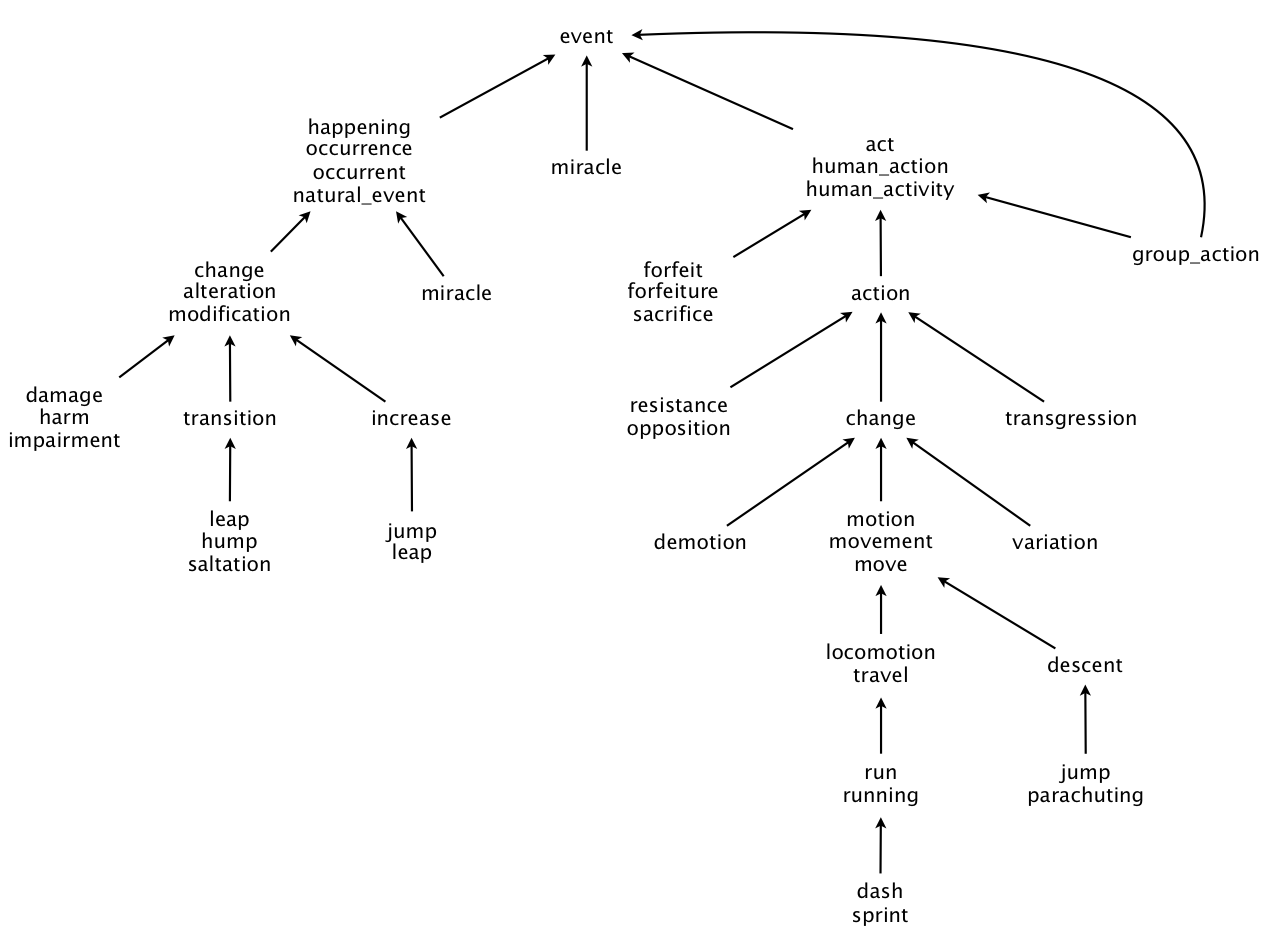
Resource: https://wordnet.princeton.edu/

In [190]:
# Defining supporting function for changing POS of NLTK to POS of Wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [191]:
# Extracting POS of tokens
df['wordnet_pos'] = df['defualt_postag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

ID          created_at      screen_name  ... num_chars num_words  num_ats
0  31035514 2021-03-16 14:00:01  WaterlooLibrary  ...       140        20        0
1  31035514 2021-03-16 12:00:02  WaterlooLibrary  ...       140        23        0
2  31035514 2021-03-15 23:15:00  WaterlooLibrary  ...       140        22        0
3  31035514 2021-03-15 20:27:00  WaterlooLibrary  ...       139        19        0
4  31035514 2021-03-15 17:50:00  WaterlooLibrary  ...       121        16        2

[5 rows x 24 columns]

In [192]:
df[['defualt_postag','wordnet_pos']]

defualt_postag                                        wordnet_pos
0     [(as, IN), (our, PRP$), (staycation, NN), (liv...  [(as, n), (our, n), (staycation, n), (lives, n...
1     [(fairy, NN), (tales, NNS), (are, VBP), (dark,...  [(fairy, n), (tales, n), (are, v), (dark, a), ...
2     [(the, DT), (smart, JJ), (way, NN), (the, DT),...  [(the, n), (smart, a), (way, n), (the, n), (ja...
3     [(april, JJ), (break, NN), (is, VBZ), (fast, J...  [(april, a), (break, n), (is, v), (fast, a), (...
4     [(theres, NNS), (still, RB), (time, NN), (to, ...  [(theres, n), (still, r), (time, n), (to, n), ...
...                                                 ...                                                ...
6486  [(while, IN), (our, PRP$), (new, JJ), (expande...  [(while, n), (our, n), (new, a), (expanded, v)...
6487  [(tick, NN), (tock, NN), (the, DT), (doomsdayc...  [(tick, n), (tock, n), (the, n), (doomsdaycloc...
6488  [(keep, VB), (your, PRP$), (eye, NN), (on, IN)...  [(keep, v), (your, n), (eye, n), (on, n), (oli...
6489  [(davidalangay, NN), (thats, VBZ), (a, DT), (g...  [(davidalangay, n), (thats, v), (a, n), (great...
6490  [(well, RB), (see, VB), (you, PRP), (sunday, V...  [(well, r), (see, v), (you, n), (sunday, v), (...

[6491 rows x 2 columns]

In [193]:
# lemmatizating tokens using WordNetLemmatizer:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemmatized_words']=df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

df['lemmatized_text']=[' '.join(map(str,i)) for i in df['lemmatized_words']]
df.head()

ID          created_at      screen_name  ... num_chars num_words  num_ats
0  31035514 2021-03-16 14:00:01  WaterlooLibrary  ...       140        20        0
1  31035514 2021-03-16 12:00:02  WaterlooLibrary  ...       140        23        0
2  31035514 2021-03-15 23:15:00  WaterlooLibrary  ...       140        22        0
3  31035514 2021-03-15 20:27:00  WaterlooLibrary  ...       139        19        0
4  31035514 2021-03-15 17:50:00  WaterlooLibrary  ...       121        16        2

[5 rows x 24 columns]

In [194]:
# Sepehr
print(df['text1'].iloc[4])
print(df['Clean_text'].iloc[4])
print(df['lemmatized_text'].iloc[4])

theres still time to register for tomorrows healing tattoos event presented with waterloolibrary featuring susanca…
theres still time register tomorrows healing tattoos event presented waterloolibrary featuring susanca
there still time to register for tomorrow heal tattoos event present with waterloolibrary featuring susanca…



---




# 3- Exploratory Data Analysis (EDA):

*   Words Frequency Distributions
*   wordcloud
## Sentiment Analysis
*   Hashtags in positive VS tweets negative tweets
## Topic Modeling

*   Fine Tuning the Parameters



---


### 3-1 Hashtags Frequency


In [195]:
df.head()

ID          created_at      screen_name  ... num_chars num_words  num_ats
0  31035514 2021-03-16 14:00:01  WaterlooLibrary  ...       140        20        0
1  31035514 2021-03-16 12:00:02  WaterlooLibrary  ...       140        23        0
2  31035514 2021-03-15 23:15:00  WaterlooLibrary  ...       140        22        0
3  31035514 2021-03-15 20:27:00  WaterlooLibrary  ...       139        19        0
4  31035514 2021-03-15 17:50:00  WaterlooLibrary  ...       121        16        2

[5 rows x 24 columns]

In [196]:
# Finding most frequent hashtgags
# value_counts function return a Series containing counts of unique values.
df['hashtags'].value_counts()

85Queen                         41
STMY                            37
kwawesome                       31
bookadventcalendar              17
ThrowbackThursday               10
                                ..
childrenslibrarian               1
AnimalCrossing                   1
whattoread                       1
oboc2019                         1
sharingaloveofreadingandfood     1
Name: hashtags, Length: 477, dtype: int64

In [197]:
number_hashtags=20
hashtags_freq=df['hashtags'].value_counts()[:number_hashtags]
hashtags_freq

85Queen               41
STMY                  37
kwawesome             31
bookadventcalendar    17
ThrowbackThursday     10
KWAwesome              9
belongtogetherWR       9
RemembranceDay         9
booklovers             8
FamilyLiteracyKW       8
HarryPotter            8
librarylove            8
Pride                  8
85Green                7
BlackHistoryMonth      6
BellLetsTalk           6
MadeInHeffner          6
IWD2019                6
BigLibraryRead         6
85queen                5
Name: hashtags, dtype: int64

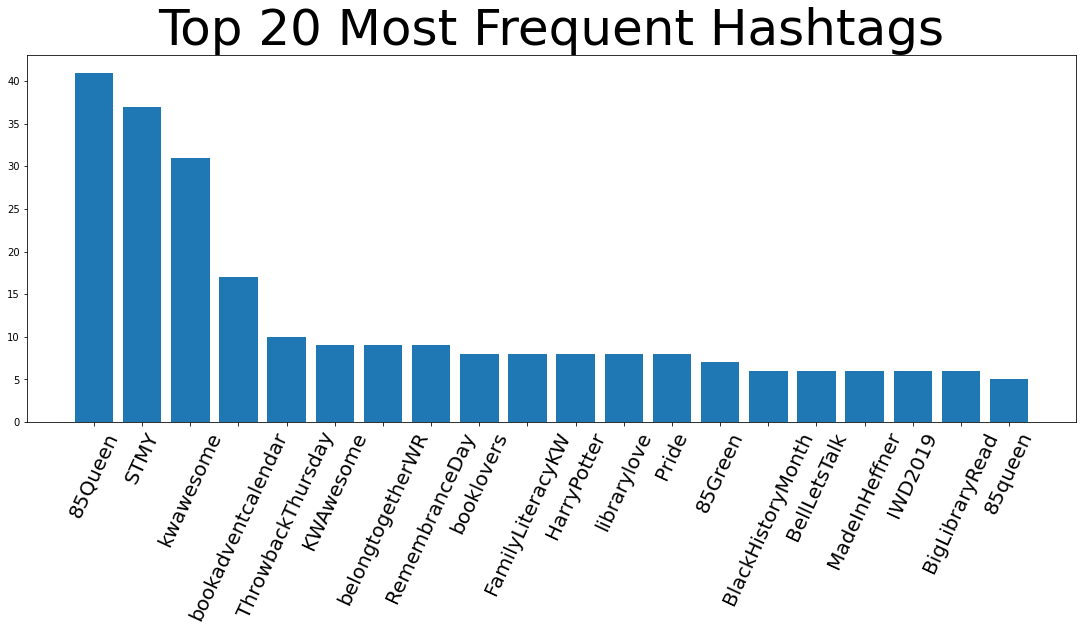

In [198]:
# Plot a bar chart showing top most frequent Hashtags
fig = plt.figure(figsize=(15,6))

plt.title(f'Top {number_hashtags} Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)

plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation='65')
plt.show()


In [199]:
# The function returns results in the descending order for values.
# The order can be changed by setting ascending parameters to True
df['hashtags'].value_counts(ascending=True)

sharingaloveofreadingandfood     1
oboc2019                         1
whattoread                       1
AnimalCrossing                   1
childrenslibrarian               1
                                ..
ThrowbackThursday               10
bookadventcalendar              17
kwawesome                       31
STMY                            37
85Queen                         41
Name: hashtags, Length: 477, dtype: int64

### 3-2- Retweeted tweets Frequency
"retweet_count" is the column that shows the number of likes for each tweet

In [200]:
# sort_values orders the dataset in terms of a give column.
hastags_most_retweeted=df.sort_values('retweet_count',ascending=False).iloc[:200]
hastags_most_retweeted.head()

ID          created_at  ... num_words num_ats
230    31035514 2021-01-28 14:57:34  ...        25       0
6152  425118862 2019-03-11 14:44:26  ...        11       0
3220   31035514 2019-12-11 16:43:46  ...        23       0
1932   31035514 2020-06-12 13:23:18  ...        17       0
6082  425118862 2019-03-16 15:55:26  ...        30       0

[5 rows x 24 columns]

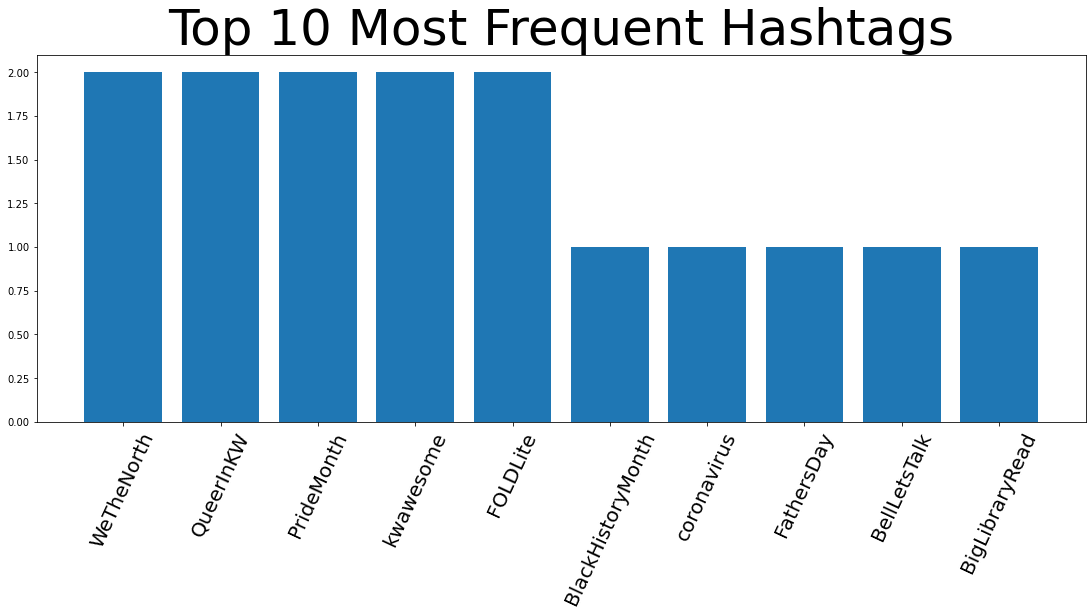

In [201]:
# Ploting a bar chart shows the top most frequent hashtags for top retweeted tweets.
hastags_most_liked=df.sort_values('retweet_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


#### **Practice time:**
Find the 100 most liked tweets? The dataframe should show the text and the number of likes for each tweets.

In [202]:
# solution:
df.sort_values('favorite_count',ascending=False).iloc[:100][['text','favorite_count']]

text  favorite_count
3453  It's official! No more overdue fines, ever! 🙌🥳...             587
4514  Thank you to everyone who reached out to us ab...             425
4967  Access to menstrual products just got a little...             403
3491  Be careful what you wish for 😉\n\nPictured: 85...             363
6423  Should the person who did this be fired y/n ht...             291
...                                                 ...             ...
4166  To support conversations and education about r...              38
4567  Have a device? Have a library card? Great! Tha...              37
4655  Say hello to our growing greens! We've got let...              37
4778  Pro tip: Use your library card to 3D print you...              37
6396  All Kitchener Public Library locations are clo...              36

[100 rows x 2 columns]

#### Practice time:
Write a code to extract 10 most frequent hashtags from 200 most liked tweets and use bar chart to show them? 

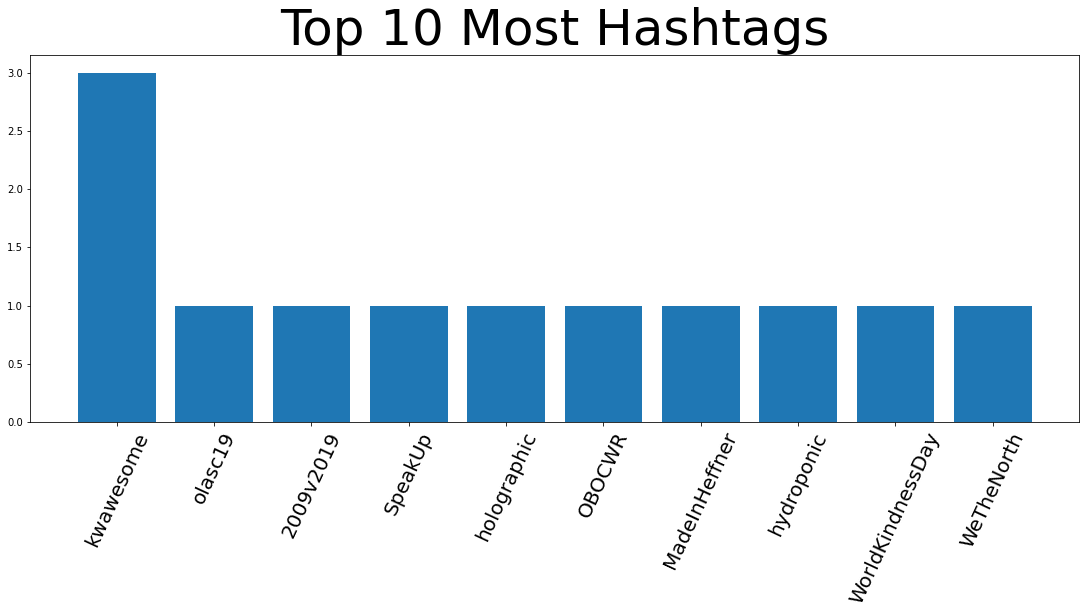

In [203]:
# Solution:

hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


### 3-3- Tweet likes Frequency
"favorite_count" is the column that shows the number of likes for each tweet

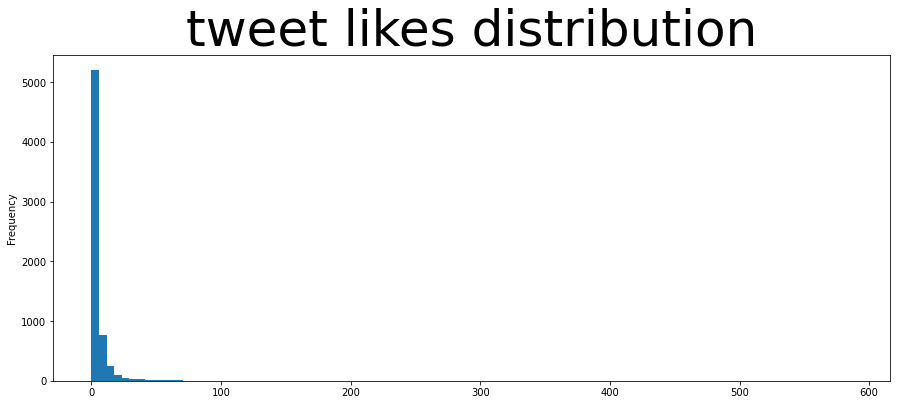

In [245]:
# Plot a hsitogram showing the distribution of tweets likes
# Histogram A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. 
# Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data. (Resource: Khanacademy.org)

fig = plt.figure(figsize=(15,6))
plt.title('tweet likes distribution', fontsize=50)
df['favorite_count'].plot.hist(bins=100)

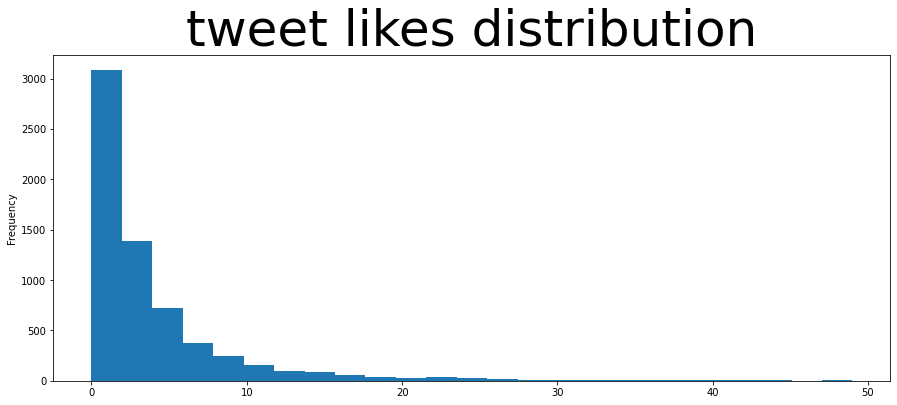

In [246]:
# Removing outliers and ploting a hsitogram showing the distribution of tweets likes 
# To get a better understanding of likes distribution, likes more that 50 are revmoved.

fig = plt.figure(figsize=(15,6))
plt.title('tweet likes distribution', fontsize=50, )
df[df['favorite_count']<50]['favorite_count'].plot.hist(bins=25)

### 3-4- Number of Hashtags in a tweet vs the Number of likes it got

In [247]:
# Group by a column
df.groupby('hashtags')

In [248]:
# aggregate values for a group by
df.groupby('hashtags').agg({'favorite_count': np.sum})

favorite_count
hashtags                                    
1eReadLivrelCanada                         0
2009v2019                                131
2021Census                                 0
365ofgoodWR                                0
3Dprint                                    0
...                                      ...
wrdsbesl                                   0
writers                                    1
youngreadersarefutureleaders               2
ywkw                                       0
zoo                                        0

[477 rows x 1 columns]

In [249]:
# Sorting a group by dataframe
df.groupby('hashtags').agg({'favorite_count': np.sum}).sort_values('favorite_count', ascending=False)

favorite_count
hashtags                          
kwawesome                      708
STMY                           246
85Queen                        223
2009v2019                      131
OBOCWR                          73
...                            ...
TurtleTuesday                    0
UWaterloo                        0
UWaterloo3MT                     0
UWaterlooCommunity               0
zoo                              0

[477 rows x 1 columns]

### 3-5- Comparing Kitchener and Waterloo Libraries: 

In [250]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean})
screen_name.head(5)


favorite_count
screen_name                    
KitchLibrary           6.284921
WaterlooLibrary        2.972906

#### Practice time:
Using screen_name, group data by and compare Kichener and Waterloo libraries in terms of the average number of likes, retweets, the number of followers, and friends. Show the results in a framework.


In [251]:
# Solution:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean,'retweet_count': np.mean, 'followers_count': np.mean, 'friends_count': np.mean})
screen_name.head()

favorite_count  retweet_count  followers_count  friends_count
screen_name                                                                   
KitchLibrary           6.284921      37.943879            12473           2975
WaterlooLibrary        2.972906      60.712746             8039           7168

### 3-6- Characteristics of tweets:

In [252]:
print('The average of the number of words',df['num_words'].mean())
print('The average of the number of chars',df['num_chars'].mean())
print('The variance of the number of words',df['num_words'].var())
print('The variance of the number of chars',df['num_chars'].var())

The average of the number of words 18.73609613310738
The average of the number of chars 125.85164073332307
The variance of the number of words 26.021715358399437
The variance of the number of chars 748.5023312829294


#### Characteristics of most liked tweets:

In [211]:
hashtags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:100]

In [212]:
print('The average of the number of words',hashtags_most_liked['num_words'].mean())
print('The average of the number of chars',hashtags_most_liked['num_chars'].mean())
print('The variance of the number of words',hashtags_most_liked['num_words'].var())
print('The variance of the number of chars',hashtags_most_liked['num_chars'].var())

The average of the number of words 19.3
The average of the number of chars 126.75
The variance of the number of words 54.79797979797981
The variance of the number of chars 667.7853535353536


#### Practice time:
Find a average and variance for of the num words for the 100 least liked tweets.  

In [213]:
# Solution: 
hashtags_least_liked=df.sort_values('favorite_count',ascending=True).iloc[:100]
print('The average of the number of words',hashtags_least_liked['num_words'].mean())
print('The average of the number of chars',hashtags_least_liked['num_chars'].mean())
print('The variance of the number of words',hashtags_least_liked['num_words'].var())
print('The variance of the number of chars',hashtags_least_liked['num_chars'].var())

The average of the number of words 18.89
The average of the number of chars 122.76
The variance of the number of words 27.75545454545454
The variance of the number of chars 691.7397979797976


## 3-6- Words Frequency Distribution
**FreqDist** tells us the frequency of each vocabulary item in the text. It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. NLTK provides built-in support for them.

In [253]:
# change all words to lowercase and removing stop words:
# Removing stop words
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])


df['lemmatized_words_clean']= df['lemmatized_words'].apply(lambda x: [word.lower() for word in x ])
df['lemmatized_words_clean'] = df['lemmatized_words_clean'].apply(lambda x: [word for word in x if word not in stop])
df['lemmatized_words_clean']

0       [staycation, life, continue, share, photo, lib...
1       [fairy, tale, dark, reason, theyre, try, warn,...
2       [smart, way, jack, reacher, novel, adapt, amaz...
3       [april, break, fast, approach, five, fun, camp...
4       [still, time, register, tomorrow, heal, tattoo...
                              ...                        
6486    [new, expand, heffnerstudio, construction, lea...
6487    [tick, tock, doomsdayclock, hold, steady, two,...
6488                            [keep, eye, olivia, work]
6489    [davidalangay, thats, great, question, econten...
6490    [well, see, sunday, conestoga, mall, family, l...
Name: lemmatized_words_clean, Length: 6491, dtype: object

In [254]:
# adding all tokens to create a list of tokens
words = df['lemmatized_words_clean']
allwords = []
for wordlist in words:
    allwords += wordlist

In [255]:
from nltk import FreqDist
max_words=100
mostcommon = FreqDist(allwords).most_common(max_words)
print(mostcommon)


[('book', 808), ('u', 698), ('library', 674), ('’', 554), ('join', 548), ('wpl', 475), ('new', 408), ('kitchlibrary', 389), ('get', 387), ('read', 368), ('day', 326), ('one', 324), ('share', 318), ('make', 281), ('today', 279), ('learn', 277), ('time', 274), ('live', 269), ('virtual', 267), ('go', 267), ('event', 264), ('great', 264), ('author', 261), ('week', 251), ('look', 248), ('year', 247), ('thanks', 242), ('free', 236), ('program', 234), ('fun', 228), ('love', 223), ('kid', 220), ('story', 217), ('take', 217), ('online', 216), ('community', 208), ('amp', 207), ('help', 206), ('know', 205), ('check', 204), ('family', 201), ('explore', 192), ('come', 176), ('home', 168), ('thank', 165), ('work', 162), ('waterloo', 160), ('open', 151), ('tomorrow', 148), ('find', 148), ('happy', 144), ('night', 144), ('start', 144), ('see', 141), ('well', 138), ('want', 137), ('world', 135), ('novel', 132), ('club', 131), ('like', 130), ('writer', 128), ('talk', 127), ('good', 126), ('use', 126), (

## 3-7- wordcloud
wordcloud is a python library for visulazing the frequency of words
Methods

**Some parameters that can be used to change the output:**
*    max_words,
*    max_font_size, 
*    max_words,
*    stopwords,

A very good resouce:
https://www.datacamp.com/community/tutorials/wordcloud-python


### Most Common Words

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


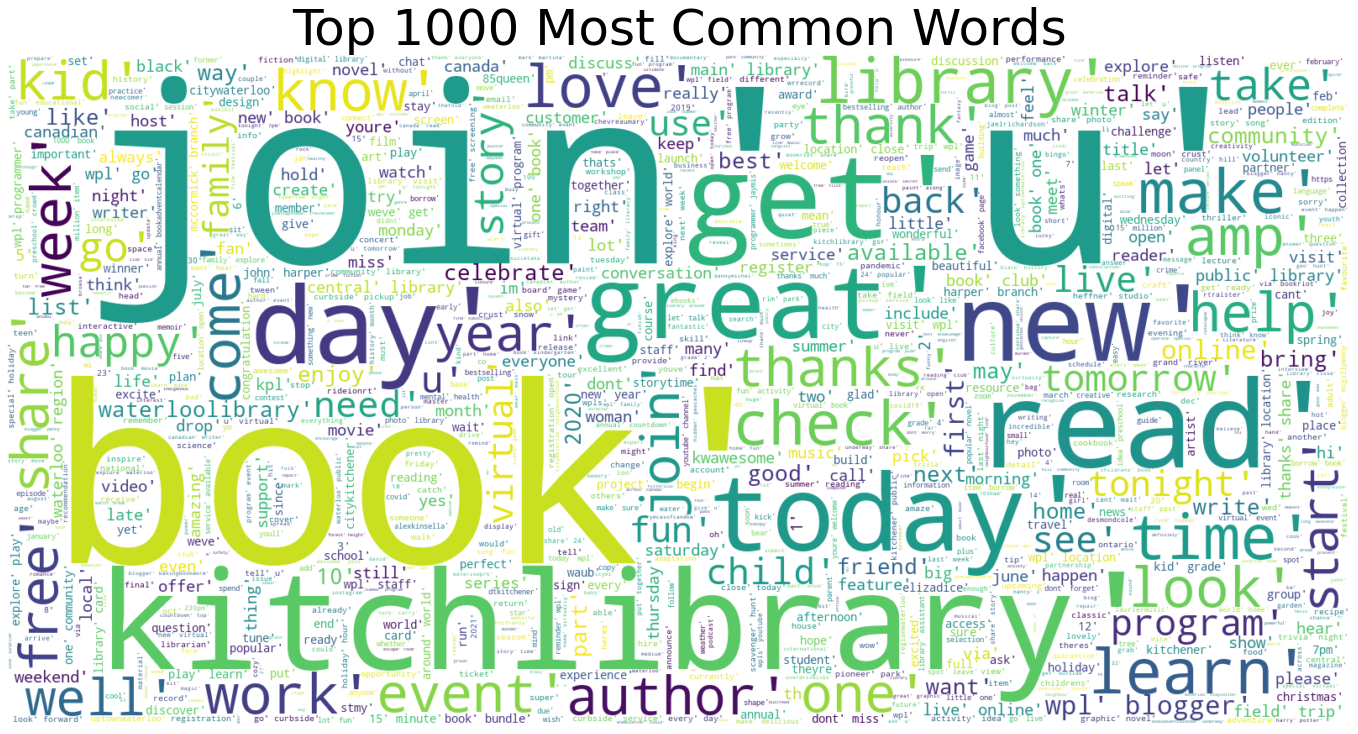

In [256]:
# Running this cell may take a few minutes
from wordcloud import WordCloud
# you can change the number of words you wan to be displayed
max_words=1000
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))
fig = plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")

# See https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html to find more interpolation

plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()


In [257]:
# Saving the wordcloud in a png file
wordcloud.to_file("//first_review.png")

# 4- Sentiment Analysis

## 4-1- Positive/Negative words Analysis

We can determine how many positive and negative words are being used in each tweet by comparing them to a predefined list of words.                             
This helps us in using external data to help build features.

We borrowed our list of pos/neg words from this study: 
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html


In [281]:
pos_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/positive-words.txt', skiprows=35, names=['words'])
pos_words = pos_words['words'].values.tolist()

#pos_words

In [282]:
neg_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/negative-words.txt', skiprows=35, names=['words'])
neg_words = neg_words['words'].values.tolist()

#neg_words

In [283]:
len(neg_words)

4783

In [284]:
# defining a suporting fuction for counting the number of positive and negative words
def count_words(tweet, words):
    count = 0
    for word in tweet.split():
        if word in words:
            count += 1
    return count

In [285]:
# count the number of positive and negative words in each tweet
df['pos_count'] = df['Clean_text'].apply(count_words, words=pos_words)
df['neg_count'] = df['Clean_text'].apply(count_words, words=neg_words)

In [286]:
df.head()

ID          created_at  ... neg_count sentiment
0  31035514 2021-03-16 14:00:01  ...         0 -0.250000
1  31035514 2021-03-16 12:00:02  ...         2 -0.150000
2  31035514 2021-03-15 23:15:00  ...         0 -0.292857
3  31035514 2021-03-15 20:27:00  ...         1  0.250000
4  31035514 2021-03-15 17:50:00  ...         0  0.000000

[5 rows x 27 columns]

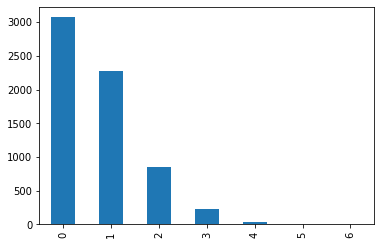

In [287]:
df['pos_count'].value_counts().plot.bar()

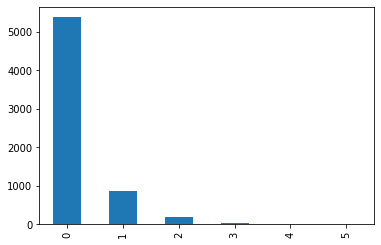

In [288]:
df['neg_count'].value_counts().plot.bar()

## 4-2- Sentiment analysis 
**Sentiment analysis** is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string.


**TextBlob** is a Python library for processing textual data. It provides an API for di common natural language processing (NLP) tasks such as **part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation**, and more.


*   PatternAnalyzer - a default classifier that is built on the pattern library

    **Note: rules-based sentiment scores**

***Polarity*** is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

***Subjectivity*** is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual

*   NaiveBayesAnalyzer - an NLTK model trained on a movie reviews corpus

NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg)

resource: https://textblob.readthedocs.io/en/dev/advanced_usage.html




In [289]:
from textblob import TextBlob
TextBlob('I love twitter').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [290]:
TextBlob('I do not love twitter').sentiment

Sentiment(polarity=-0.25, subjectivity=0.6)

In [280]:
# polarity and subjectivity can be seperated
print(TextBlob('I do not love twitter').sentiment.polarity)
print(TextBlob('I do not love twitter').sentiment.subjectivity)

-0.25
0.6


In [231]:

df['sentiment']= df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

ID          created_at  ... neg_count sentiment
0  31035514 2021-03-16 14:00:01  ...         0 -0.250000
1  31035514 2021-03-16 12:00:02  ...         2 -0.150000
2  31035514 2021-03-15 23:15:00  ...         0 -0.292857
3  31035514 2021-03-15 20:27:00  ...         1  0.250000
4  31035514 2021-03-15 17:50:00  ...         0  0.000000

[5 rows x 27 columns]

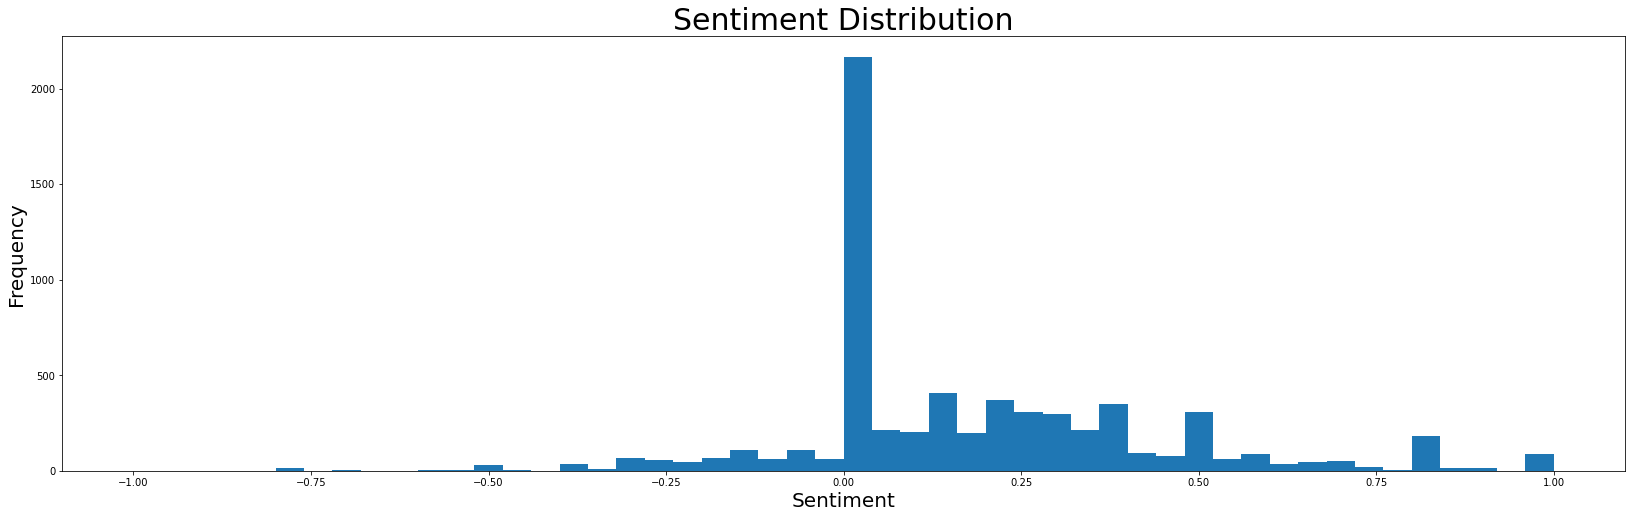

In [232]:
plt.figure(figsize=(28,8))
#plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

Let`s have a look at poitive tweets:

In [233]:
df[df['sentiment']>.7]['text'].iloc[2]

'Anne Lamott on Writing a Book for Those Feeling Hopeless. @lithub\nasked the best selling author five questions, inc… https://t.co/Kb7b14K9cY'

And negative tweets

In [ ]:
df[df['sentiment']<-.7]['text'].iloc[0]

### Most Frequent words with positive sentiment

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


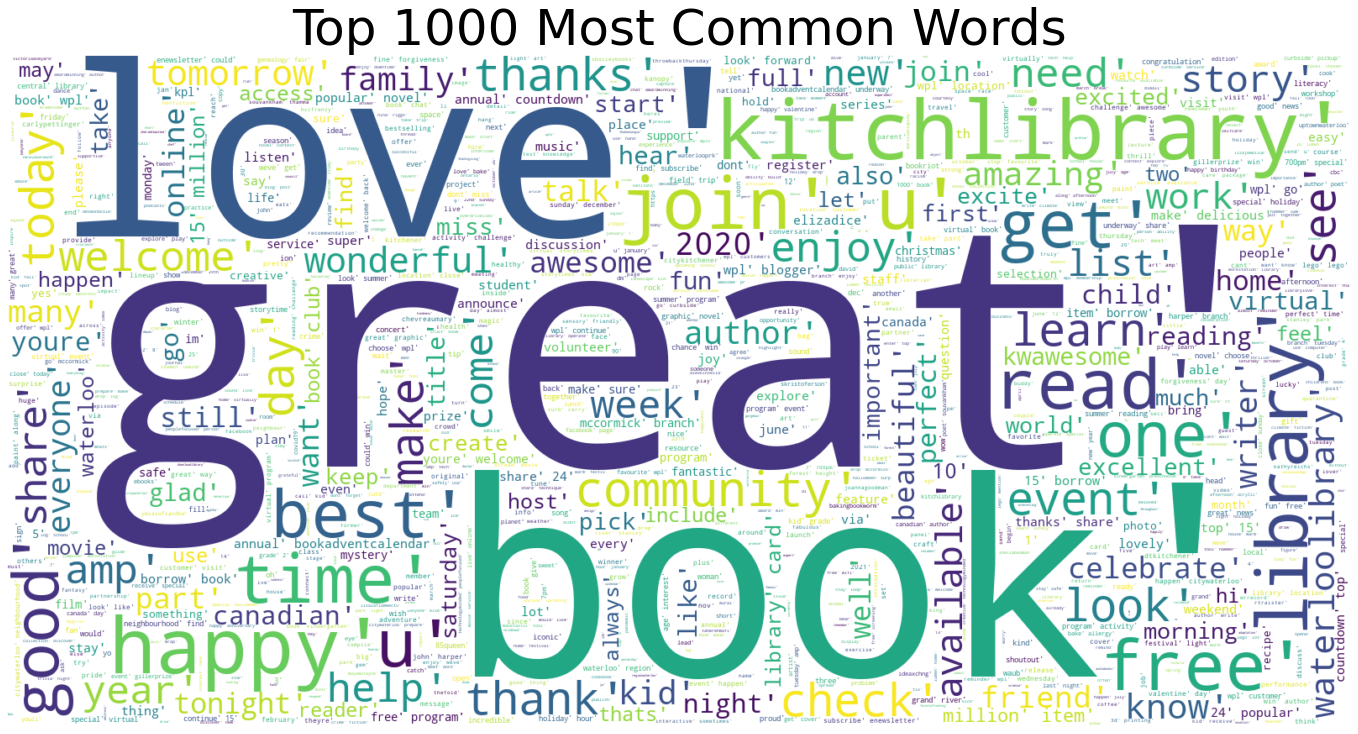

In [236]:
words = df[df['sentiment']>0.33]['lemmatized_words_clean']
allwords = []
for wordlist in words:
    allwords += wordlist

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
# you can change the number of words you wan to be displayed
max_words=1000
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))




fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Fequent words with negative sentiment

110
Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


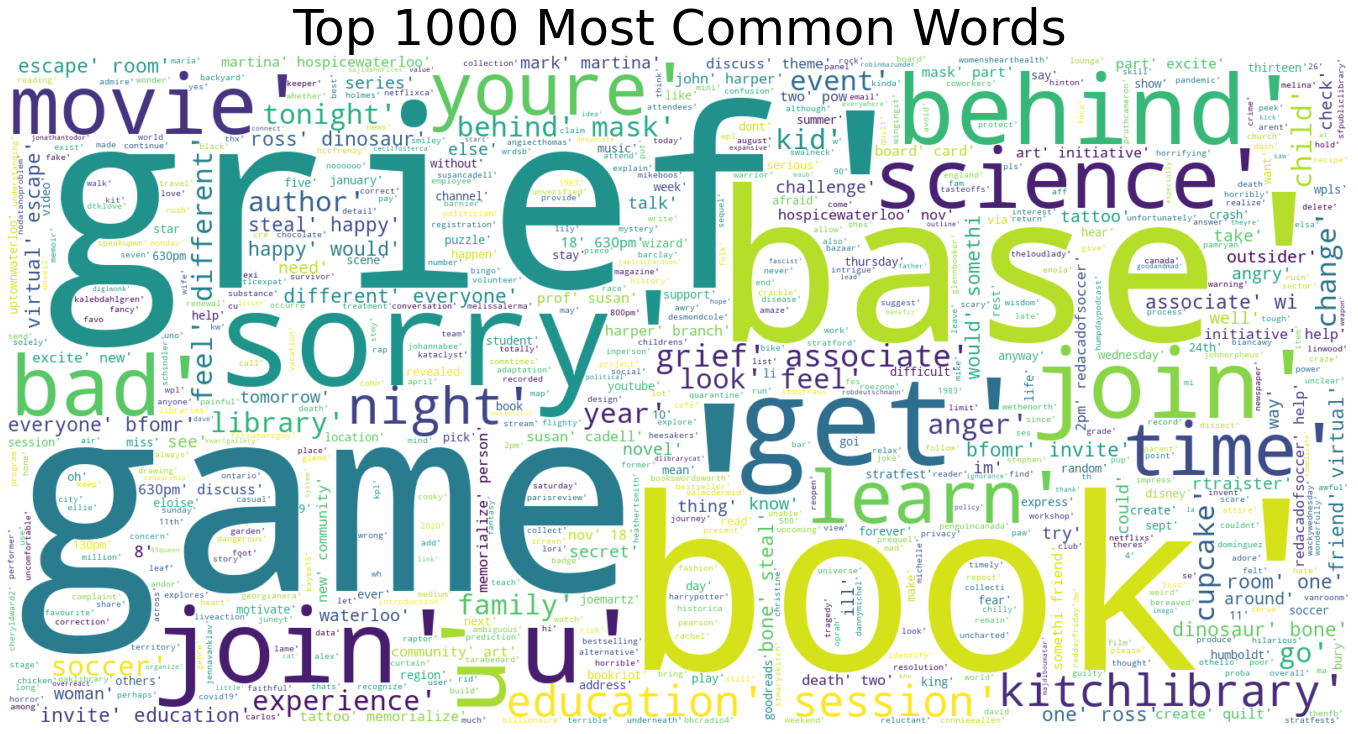

In [237]:
words = df[df['sentiment']<-0.33]['lemmatized_words_clean']
print(len(words))
allwords = []
for wordlist in words:
    allwords += wordlist
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
# you can change the number of words you wan to be displayed
max_words=1000
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))



fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Characteristics of positive and negative tweets 

In [238]:
positive_tweets= df[df['sentiment']>0.33]
print('The average of the number of words',positive_tweets['num_words'].mean())
print('The average of the number of chars',positive_tweets['num_chars'].mean())
print('The variance of the number of words',positive_tweets['num_words'].var())
print('The variance of the number of chars',positive_tweets['num_chars'].var())

The average of the number of words 18.636138613861387
The average of the number of chars 124.53032178217822
The variance of the number of words 23.00560340863802
The variance of the number of chars 682.1278725898937


In [239]:
negative_tweets=df[df['sentiment']<-0.33]
print('The average of the number of words',negative_tweets['num_words'].mean())
print('The average of the number of chars',negative_tweets['num_chars'].mean())
print('The variance of the number of words',negative_tweets['num_words'].var())
print('The variance of the number of chars',negative_tweets['num_chars'].var())

The average of the number of words 19.272727272727273
The average of the number of chars 126.71818181818182
The variance of the number of words 18.95246038365305
The variance of the number of chars 620.497831526272


# 5- Topic Modeling
**Topic Modeling:** Topic Modeling strives to automatically discovers the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.


**Latent Semantic Analysis (LSA):** One of the oldest and most common techniques tor topic modeling

**Latent Dirichlet Allocation (LDA):** Latent Dirichlet Allocation is an technique for topic modeling and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.


In [295]:
# importing libraries
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Documents-Terms matrix**
Documents-Terms matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of document. it is used as an input for topic modeling techniqeus.

Types of Documents-Terms matrices:
*   Raw counnt: CountVectorizer
*   Term Frequency–Inverse Document Frequency (TF-IDF) : is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus (TfidfVectorizer)


In [296]:
# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents

# Raw Counts
# vect = CountVectorizer(ngram_range=(1,2),
#                       min_df=20, 
#                       max_df=0.2, 
#                       stop_words='english', 
#                       )

# TF-IDF
vect=TfidfVectorizer(lowercase=True,
                     ngram_range=(1,2),
                     min_df=10,
                     max_df=0.2,
                     stop_words='english')
# Fit and transform
X = vect.fit_transform(df['text1'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


## 5-1 Latent Semantic Analysis (LSA)

In [300]:
from gensim.models.lsimodel import LsiModel
lsimodel=LsiModel(corpus, num_topics=3, id2word=id_map)
lsimodel.print_topics()

[(0,
  '0.272*"library" + 0.234*"book" + 0.224*"kitchlibrary" + 0.208*"join" + 0.202*"thanks" + 0.190*"books" + 0.185*"new" + 0.155*"wpl" + 0.141*"great" + 0.131*"day"'),
 (1,
  '0.776*"thanks" + 0.383*"thanks sharing" + 0.374*"sharing" + -0.105*"join" + -0.082*"book" + -0.065*"wpl" + -0.061*"new" + -0.060*"library" + 0.059*"thanks coming" + -0.058*"live"'),
 (2,
  '-0.561*"thank" + -0.474*"library" + 0.282*"book" + -0.203*"kitchlibrary" + 0.143*"join" + 0.128*"wpl" + -0.126*"central" + -0.124*"central library" + 0.111*"new" + 0.107*"books"')]

## 5-2- Latent Dirichlet Allocation (LDA):

In [ ]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()
#ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)

[(0,
  '0.021*"know" + 0.018*"virtual" + 0.018*"learn" + 0.018*"fun" + 0.017*"home" + 0.014*"join" + 0.014*"week" + 0.014*"reading" + 0.013*"waterloo" + 0.012*"community"'),
 (1,
  '0.055*"kitchlibrary" + 0.037*"library" + 0.030*"new" + 0.030*"day" + 0.024*"great" + 0.020*"today" + 0.018*"books" + 0.018*"thank" + 0.014*"time" + 0.013*"read"'),
 (2,
  '0.031*"thanks" + 0.027*"book" + 0.026*"join" + 0.019*"library" + 0.018*"free" + 0.016*"live" + 0.014*"central" + 0.014*"march" + 0.014*"85queen" + 0.013*"dont"')]

### LDA: Parameters Fine Tuning
Parameters that cane be modified:
*    The number of topics
*    The part of speech:

     *One popular way is to look only at terms that are from one part of speech (nouns, verbs,or adjectives). Then add more to find if meaningful topics appears.*
*    The number of passes:

      *Increasing the number of passess results in more robust words distributions.*

**LDA for noun words**

In [ ]:
# creating a list of Nouns
df['nouns']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN'])
df['nouns']=[' '.join(map(str,i)) for i in df['nouns']]
df['nouns']

0                                   canada today et book…
1                                                    call
2                                      year spring reaso…
3                             register lecture laurieredu
4       thanh nguyen ralph ellison alice walker rapidf...
                              ...                        
6486                                         donation pu…
6487                       reading kitchlibrary libby app
6488                                      carriem carriem
6489                                   winter film series
6490                                            beep beep
Name: nouns, Length: 6491, dtype: object

In [ ]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.057*"day" + 0.038*"event" + 0.035*"community" + 0.028*"thank" + 0.026*"join" + 0.024*"tomorrow" + 0.024*"night" + 0.024*"home" + 0.022*"author" + 0.021*"family"'),
 (1,
  '0.066*"book" + 0.054*"library" + 0.048*"today" + 0.043*"time" + 0.029*"wpl" + 0.027*"kitchlibrary" + 0.020*"year" + 0.018*"fun" + 0.017*"program" + 0.016*"series"')]

In [ ]:
# Number of topics =3
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.073*"library" + 0.057*"time" + 0.040*"tomorrow" + 0.040*"book" + 0.039*"event" + 0.037*"home" + 0.028*"rtraister" + 0.026*"kitchlibrary" + 0.025*"music" + 0.023*"program"'),
 (1,
  '0.070*"today" + 0.048*"week" + 0.042*"community" + 0.037*"family" + 0.032*"wpl" + 0.025*"world" + 0.025*"day" + 0.024*"series" + 0.024*"share" + 0.023*"reading"'),
 (2,
  '0.061*"day" + 0.050*"book" + 0.044*"join" + 0.041*"thank" + 0.036*"night" + 0.033*"author" + 0.027*"youre" + 0.024*"year" + 0.023*"pm" + 0.021*"conversation"')]

In [ ]:
# Number of topics =4
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.075*"event" + 0.072*"book" + 0.051*"tomorrow" + 0.048*"night" + 0.033*"join" + 0.032*"music" + 0.026*"registration" + 0.024*"story" + 0.024*"list" + 0.024*"month"'),
 (1,
  '0.089*"library" + 0.079*"today" + 0.071*"time" + 0.061*"community" + 0.049*"week" + 0.035*"youre" + 0.034*"rtraister" + 0.028*"program" + 0.025*"online" + 0.024*"book"'),
 (2,
  '0.064*"thank" + 0.056*"kitchlibrary" + 0.054*"home" + 0.047*"march" + 0.047*"fun" + 0.035*"world" + 0.035*"family" + 0.033*"conversation" + 0.032*"series" + 0.031*"reading"'),
 (3,
  '0.145*"day" + 0.062*"wpl" + 0.057*"author" + 0.040*"year" + 0.034*"amp" + 0.029*"dont" + 0.029*"park" + 0.028*"book" + 0.024*"film" + 0.022*"life"')]

***LDA for Nouns and Adjectives***

In [ ]:
# creating a list of Nouns
df['nouns_adjs']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN' or pos == 'JJ' ])

#for wordlist in words:
#    ' '.join(wordlist)
#len(wordlist)
df['nouns_adjs']=[' '.join(map(str,i)) for i in df['nouns_adjs']]
df['nouns_adjs']

0                             final canada today et book…
1                                                    call
2                                    s year spring reaso…
3                             register lecture laurieredu
4       viet thanh nguyen ralph ellison alice walker r...
                              ...                        
6486                                generous donation pu…
6487              reading kitchlibrary libby app canadian
6488                                      carriem carriem
6489    winter film series kitchlibrary tim documentar...
6490                                            beep beep
Name: nouns_adjs, Length: 6491, dtype: object

In [ ]:
df['text'].iloc[3]

'Register now for this lecture with our partners from @LaurierEdu at: https://t.co/oGLyuJd3DF https://t.co/kpWT0AsDTx'

In [ ]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.063*"kitchlibrary" + 0.041*"new" + 0.041*"book" + 0.024*"community" + 0.018*"central" + 0.018*"live" + 0.017*"wpl" + 0.016*"author" + 0.016*"amp" + 0.014*"join"'),
 (1,
  '0.069*"library" + 0.038*"day" + 0.027*"today" + 0.025*"time" + 0.024*"great" + 0.022*"good" + 0.020*"event" + 0.020*"free" + 0.019*"thank" + 0.016*"week"')]

In [ ]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.104*"kitchlibrary" + 0.049*"book" + 0.023*"author" + 0.021*"waterloo" + 0.021*"rtraister" + 0.018*"wpl" + 0.018*"saturday" + 0.018*"event" + 0.016*"world" + 0.016*"conversation"'),
 (1,
  '0.057*"day" + 0.037*"library" + 0.028*"thank" + 0.026*"virtual" + 0.022*"home" + 0.022*"event" + 0.021*"week" + 0.020*"happy" + 0.019*"youre" + 0.017*"public"'),
 (2,
  '0.062*"library" + 0.055*"new" + 0.033*"community" + 0.029*"today" + 0.027*"great" + 0.025*"live" + 0.025*"central" + 0.023*"time" + 0.022*"amp" + 0.021*"online"')]

In [ ]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.096*"kitchlibrary" + 0.052*"book" + 0.027*"author" + 0.022*"waterloo" + 0.021*"wpl" + 0.019*"world" + 0.018*"rtraister" + 0.017*"saturday" + 0.016*"series" + 0.016*"event"'),
 (1,
  '0.052*"day" + 0.035*"library" + 0.028*"virtual" + 0.027*"week" + 0.026*"thank" + 0.023*"home" + 0.023*"fun" + 0.021*"family" + 0.021*"event" + 0.020*"happy"'),
 (2,
  '0.061*"library" + 0.058*"new" + 0.033*"community" + 0.029*"today" + 0.028*"great" + 0.027*"live" + 0.023*"central" + 0.023*"online" + 0.023*"time" + 0.021*"amp"')]

In [ ]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.127*"kitchlibrary" + 0.041*"event" + 0.039*"book" + 0.038*"great" + 0.032*"amp" + 0.026*"rtraister" + 0.020*"author" + 0.019*"series" + 0.019*"amazing" + 0.016*"month"'),
 (1,
  '0.059*"day" + 0.041*"thank" + 0.039*"library" + 0.032*"virtual" + 0.029*"happy" + 0.025*"public" + 0.025*"tonight" + 0.024*"music" + 0.021*"program" + 0.020*"reading"'),
 (2,
  '0.093*"library" + 0.049*"today" + 0.045*"free" + 0.044*"time" + 0.040*"good" + 0.032*"central" + 0.032*"live" + 0.027*"online" + 0.027*"march" + 0.024*"central library"'),
 (3,
  '0.084*"new" + 0.052*"wpl" + 0.042*"community" + 0.033*"home" + 0.030*"family" + 0.029*"book" + 0.026*"youre" + 0.026*"waterloo" + 0.023*"year" + 0.021*"world"')]

In [ ]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.101*"library" + 0.077*"new" + 0.054*"free" + 0.031*"central" + 0.023*"central library" + 0.021*"public" + 0.021*"today" + 0.020*"pm" + 0.017*"amp" + 0.016*"available"'),
 (1,
  '0.063*"wpl" + 0.044*"good" + 0.034*"today" + 0.031*"family" + 0.030*"library" + 0.026*"time" + 0.024*"home" + 0.023*"rtraister" + 0.023*"week" + 0.022*"music"'),
 (2,
  '0.109*"kitchlibrary" + 0.057*"great" + 0.051*"day" + 0.026*"happy" + 0.026*"march" + 0.025*"waterloo" + 0.023*"youre" + 0.016*"amazing" + 0.016*"story" + 0.016*"night"'),
 (3,
  '0.080*"book" + 0.039*"join" + 0.038*"virtual" + 0.036*"live" + 0.035*"thank" + 0.033*"event" + 0.031*"community" + 0.031*"author" + 0.023*"online" + 0.021*"tonight"')]

In [ ]:
new_doc= ["Waterloo Public Library will have an event for kids. The event will start at 5 PM and close at 8 PM, tomorrow. It is free for Waterloo community."]
def topic_distribution():
    
    # Fit and transform
    xx = vect.transform(new_doc)
    
    # Convert sparse matrix to gensim corpus.
    x_corpus = gensim.matutils.Sparse2Corpus(xx, documents_columns=False)
    
    # Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
    id_map = dict((v, k) for k, v in vect.vocabulary_.items())

    #print()
    #print(ldamodel[x_corpus])
    
    return list(ldamodel[x_corpus])[0] 
topic_distribution()

[(0, 0.53286785), (1, 0.019378424), (2, 0.26195762), (3, 0.18579613)]